`Figures.ipynb`: Produce figures for the manuscript.

Copyright (C) 2024  Benedict V. A. Mittelbach and Alexander S. Brunmayr

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <https://www.gnu.org/licenses/>.

In [3]:
import pathlib

REPODIR = pathlib.Path('.').resolve() # directory of the repository
INPUTDIR = REPODIR / 'input'
OUTPUTDIR = REPODIR / 'output' / 'figures'
OUTPUTDIR.mkdir(parents=True, exist_ok=True)

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D
import math



# Global settings
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.grid.which'] = 'both'
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['patch.edgecolor'] = 'k'
plt.rcParams['patch.facecolor'] = [0.7, 0.7, 0.7]
plt.rcParams['font.family'] = 'Tahoma'
plt.rcParams['font.size'] = 20

# Colors
colors = {
    "red1": "#C01511",
    "blue1": "#247FBF",
    "blue2": "#054573", 
    "red2": "#FF3430", 
    "green1": "#007324",
    "green2": "#11BF48",
    "yellow1": "#BFBF24",
    "darkred": "#731716",
    "purple1": "#BF08B5",
    "grey":"#B5B5B5",
    "orange": "#F29F22"
},

In [5]:
# Import Atmospheric Data  
atmo_path = INPUTDIR / "Delta14CO2_atmosphere.csv"
Atmo = pd.read_csv(atmo_path, usecols=["year", "Delta14C"]).rename(columns={'year':'Year', 'Delta14C':'Delta'})

In [6]:
# Import Final Datatable
data_path = INPUTDIR / "sedimentcore_data.xlsx"
Data = pd.read_excel(data_path, sheet_name="input_data")

# Import XRF Data
PbXRF = pd.read_excel(data_path, sheet_name="XRF", usecols=["Depth (cm)", "Pb (Cps)"])

# Create Figure 2 to show downcore Data

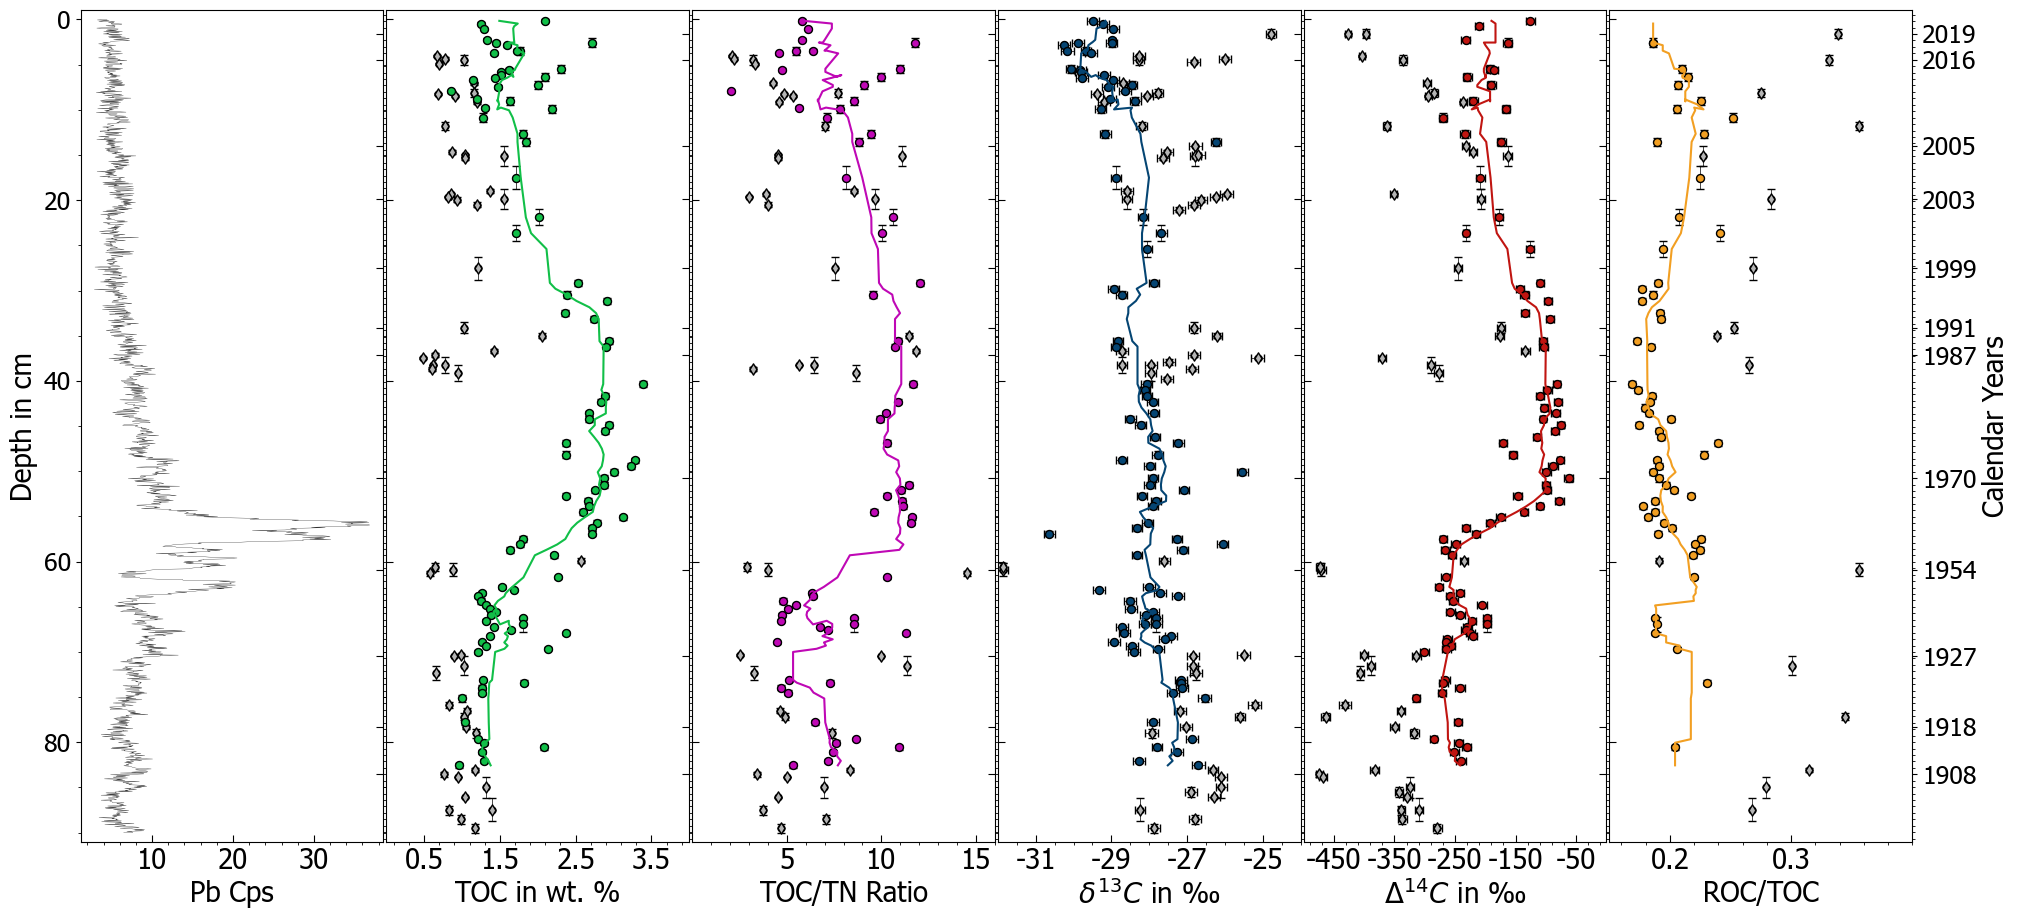

In [7]:
# Figure 2
floods_on = True

fig, axs = plt.subplots(1, 6, figsize=(20, 9), constrained_layout=True)
fig.set_constrained_layout_pads(w_pad=0./72, h_pad=0./72, hspace=0., wspace=0.)

# Get the indices of the data points with non-missing age values
non_missing_age_indices = ~Data['Marker'].isna()
depth_with_age = Data['Mean depth'][non_missing_age_indices]
age_with_depth = Data['Marker'][non_missing_age_indices]
sorted_depth_with_age = np.sort(depth_with_age)
sorted_indices = np.argsort(depth_with_age)
sorted_age_with_depth = age_with_depth.iloc[sorted_indices].values

Data['Thickness'] = Data['Bottom'] - Data['Top']

# Define the width of the running average window for flood and non-flood data
floodmeanN = 5
nonfloodmeanN = 10

# Colors
grey = colors[0]["grey"]
green2 = colors[0]["green2"]
purple1 = colors[0]["purple1"]
blue2 = colors[0]["blue2"]
red1 = colors[0]["red1"]
orange = colors[0]["orange"]

msize = 10 #markersize errorbars
Marksize = 33#colored markers

# Pb XrF
ax = axs[0]
ax.plot(PbXRF['Pb (Cps)'], PbXRF['Depth (cm)'], 'k', linewidth=0.2)
ax.set_ylim(-1, 91)
ax.set_xlabel('Pb Cps')
ax.set_ylabel('Depth in cm')
ax.invert_yaxis()

# TOC
ax = axs[1]
floods = Data['Flood'] == True
non_floods = ~floods
ax.errorbar(Data['TOC'][non_floods], Data['Mean depth'][non_floods], yerr=Data['Thickness'][non_floods]/2, fmt='.',
            color="black", markersize=msize, elinewidth= 0.5, capsize = 3, zorder = 1)
if floods_on:
    ax.errorbar(Data['TOC'][floods], Data['Mean depth'][floods], yerr=Data['Thickness'][floods]/2, fmt='.', color="black",
                markersize=msize, elinewidth= 0.5, capsize = 3, zorder = 1)
    ax.scatter(Data['TOC'][floods], Data['Mean depth'][floods], Marksize, c=grey, marker='d', edgecolors="black", zorder=2)
ax.scatter(Data['TOC'][non_floods], Data['Mean depth'][non_floods], Marksize, c=green2, marker='o', edgecolors="black", zorder=2)
toc_moving_avg = Data['TOC'][non_floods].rolling(window=nonfloodmeanN, center=True, min_periods=1).mean()
ax.plot(toc_moving_avg, Data['Mean depth'][non_floods], color=green2, linewidth=1.5)
ax.set_xlim(0, 4)
ax.set_ylim(-1, 91)
ax.set_xticks([0.5,1.5,2.5,3.5])
ax.set_xticklabels([0.5,1.5,2.5,3.5])
ax.set_xlabel('TOC in wt. %')
ax.invert_yaxis()

# CNRatio
ax = axs[2]
ax.errorbar(Data['TOC_TN'][non_floods], Data['Mean depth'][non_floods], yerr=Data['Thickness'][non_floods]/2, fmt='.',
            color="black", markersize=msize, elinewidth= 0.5, capsize = 3, zorder = 1)
if floods_on:
    ax.errorbar(Data['TOC_TN'][floods], Data['Mean depth'][floods], yerr=Data['Thickness'][floods]/2, fmt='.',
                color="black", markersize=msize, elinewidth= 0.5, capsize = 3, zorder = 1)
    ax.scatter(Data['TOC_TN'][floods], Data['Mean depth'][floods], Marksize, c=grey, marker='d', edgecolors="black", zorder=2)
ax.scatter(Data['TOC_TN'][non_floods], Data['Mean depth'][non_floods],Marksize, c=purple1, marker='o', edgecolors="black", zorder=2)
toc_moving_avg = Data['TOC_TN'][non_floods].rolling(window=nonfloodmeanN, center=True, min_periods=1).mean()
ax.plot(toc_moving_avg, Data['Mean depth'][non_floods], color=purple1, linewidth=1.5)
ax.set_xlim(0, 16)
ax.set_ylim(-1, 91)
ax.set_xticks([5,10,15])
ax.set_xticklabels([5, 10, 15])
ax.set_xlabel('TOC/TN Ratio')
ax.invert_yaxis()

# 13C
ax = axs[3]
ax.errorbar(Data['d13C'][non_floods], Data['Mean depth'][non_floods], yerr=Data['Thickness'][non_floods]/2,
            xerr=Data['d13C_sigma'][non_floods], fmt='.',
            color="black", markersize=msize, elinewidth= 0.5, capsize = 3, zorder = 1)
if floods_on:
    ax.errorbar(Data['d13C'][floods], Data['Mean depth'][floods], yerr=Data['Thickness'][floods]/2,
                xerr=Data['d13C_sigma'][floods], fmt='.', color="black", markersize=msize, elinewidth= 0.5, capsize = 3, zorder = 1)
    ax.scatter(Data['d13C'][floods], Data['Mean depth'][floods], Marksize, c=grey, marker='d', edgecolors="black", zorder=2)
ax.scatter(Data['d13C'][non_floods], Data['Mean depth'][non_floods], Marksize, c=blue2, marker='o', edgecolors="black", zorder=2)
toc_moving_avg = Data['d13C'][non_floods].rolling(window=nonfloodmeanN, center=True, min_periods=1).mean()
ax.plot(toc_moving_avg, Data['Mean depth'][non_floods], color=blue2, linewidth=1.5)
ax.set_xlim(-32, -24)
ax.set_ylim(-1, 91)
ax.set_xticks([-31, -29, -27, -25])
ax.set_xticklabels([-31, -29, -27, -25])
ax.set_xlabel(r'$\delta^{13}C$ in ‰')
ax.invert_yaxis()

# 14C
ax = axs[4]
ax.errorbar(Data['D14C'][non_floods], Data['Mean depth'][non_floods], yerr=Data['Thickness'][non_floods]/2,
            xerr=Data['D14C_sigma'][non_floods], fmt='.', 
            color="black", markersize=msize, elinewidth= 0.5, capsize = 3, zorder = 1)
if floods_on:
    ax.errorbar(Data['D14C'][floods], Data['Mean depth'][floods], yerr=Data['Thickness'][floods]/2,
                xerr=Data['D14C_sigma'][floods], fmt='.', color="black", markersize=msize, elinewidth= 0.5, capsize = 3, zorder = 1)
    ax.scatter(Data['D14C'][floods], Data['Mean depth'][floods], Marksize, c=grey, marker='d', edgecolors="black", zorder=2)
ax.scatter(Data['D14C'][non_floods], Data['Mean depth'][non_floods], Marksize, c=red1, marker='o', edgecolors="black", zorder=2)
toc_moving_avg = Data['D14C'][non_floods].rolling(window=nonfloodmeanN, center=True, min_periods=1).mean()
ax.plot(toc_moving_avg, Data['Mean depth'][non_floods], color=red1, linewidth=1.5)
ax.set_xlim(-500, 0)
ax.set_ylim(-1, 91)
ax.set_xticks([-450, -350, -250, -150, -50])
ax.set_xticklabels([-450, -350, -250, -150, -50])
ax.set_xlabel(r'$\Delta^{14}C$ in ‰')
ax.invert_yaxis()

# ROC
ax = axs[5]
ax.errorbar(Data['ROC_TOC'][non_floods], Data['Mean depth'][non_floods], yerr=Data['Thickness'][non_floods]/2, fmt='.',
            color="black", markersize=msize, elinewidth= 0.5, capsize = 3, zorder = 1)
if floods_on:
    ax.errorbar(Data['ROC_TOC'][floods], Data['Mean depth'][floods], yerr=Data['Thickness'][floods]/2, fmt='.',
                 color="black", markersize=msize, elinewidth= 0.5, capsize = 3, zorder = 1)
    ax.scatter(Data['ROC_TOC'][floods], Data['Mean depth'][floods], Marksize, c=grey, marker='d', edgecolors="black", zorder=2)
ax.scatter(Data['ROC_TOC'][non_floods], Data['Mean depth'][non_floods], Marksize, c=orange, marker='o', edgecolors="black", zorder=2)
toc_moving_avg = Data['ROC_TOC'][non_floods].rolling(window=nonfloodmeanN, center=True, min_periods=1).mean()
ax.plot(toc_moving_avg, Data['Mean depth'][non_floods], color=orange, linewidth=1.5)
ax.set_xlim(0.15, 0.4)
ax.set_ylim(-1, 91)
ax.set_xticks([0.2,0.3])
ax.set_xticklabels([0.2,0.3])
ax.set_xlabel('ROC/TOC')
ax.set_ylabel('')
ax.invert_yaxis()


# For each subplot
for i, ax in enumerate(axs):
    # Remove the y-axis labels for the 2nd, 3rd, 4th, and 5th plots
    if i in [1, 2, 3, 4]:
        ax.set_ylabel('')
        ax.set_yticklabels([])
    
    # Remove the gridlines for all plots
    ax.grid(False,which='both')
    
    ax.tick_params(axis='y', labelsize=18)
    # Create a secondary y-axis for the current subplot
    ax2 = ax.twinx()
    # Set the limits and ticks for the secondary y-axis
    ax2.set_ylim(ax.get_ylim())
    ax2.set_yticks(depth_with_age)
    ax2.set_yticklabels(age_with_depth)
    
    formatted_labels = [str(int(label)) for label in age_with_depth]
    ax2.set_yticklabels(formatted_labels, fontsize=18)
    
    # Hide the y-axis labels for all subplots except the last one
    if i != len(axs) - 1:
        ax2.set_yticklabels([])
    else:
        ax.set_yticklabels([])
        ax2.set_ylabel('Calendar Years')

    ax2.grid(False,which='both')
    
     # Extend the x-axis ticks into the plot without being negative
    ax.tick_params(axis='x', direction='in', length=5, bottom=True, top=False)  
    
    # Extend the y-axis ticks into the plot
    if i != 0:  # not the leftmost plot
        ax.tick_params(axis='y', direction='in', length=5, left=True, right=False)  
    if i != len(axs) - 1:  # not the rightmost plot
        ax2.tick_params(axis='y', direction='in', length=5, left=False, right=True)  

    # Remove white space between subplots
    ax.set_adjustable('box')
    ax.set_clip_on(False)
    ax.set_frame_on(True)
    ax2.set_frame_on(False)
    
fig.savefig(OUTPUTDIR / "Figure2_Downcoredata.svg", format="svg", dpi=600)
plt.show()

## Create Figure 3; Boxplots of Flood vs. non-flood Layers

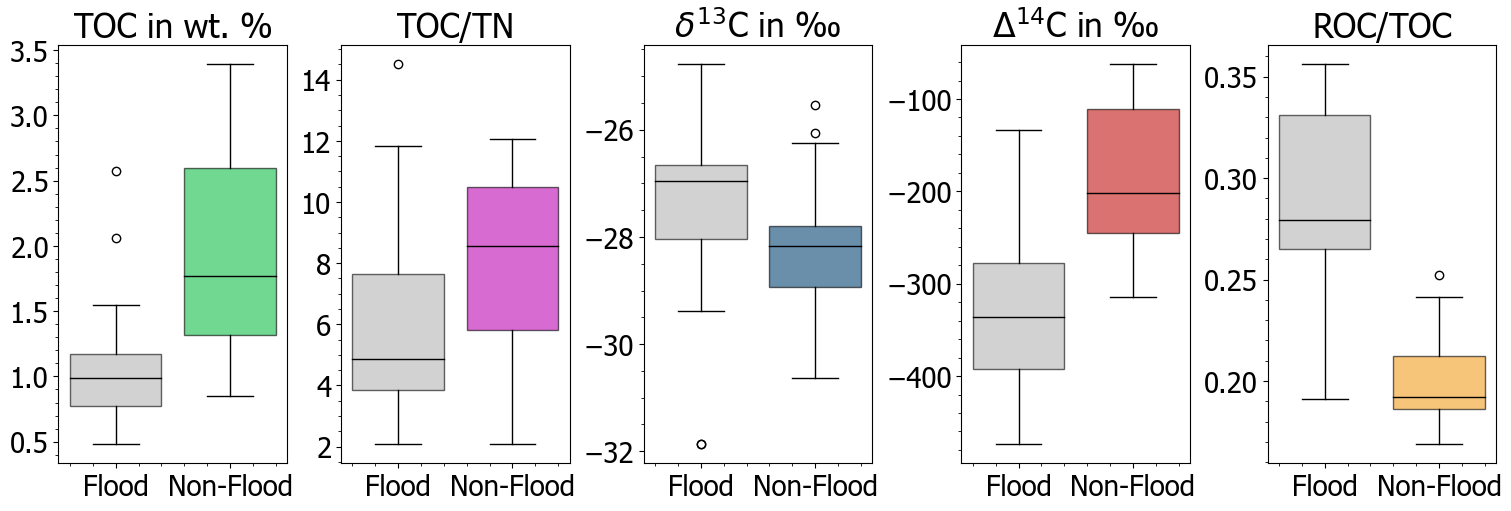

In [8]:
fig, axs = plt.subplots(1, 5, figsize=(15, 5), constrained_layout=True)

# Variables and titles
variables = ['TOC', 'TOC_TN', 'd13C', 'D14C', 'ROC_TOC']
titles = [r'TOC in wt. %', r'TOC/TN', r'$\delta^{13}$C in ‰', r'$\Delta^{14}$C in ‰', r'ROC/TOC']
colors = [green2, purple1, blue2, red1, orange]

# Create boxplots
for i, (var, title, color) in enumerate(zip(variables, titles, colors)):
    ax = axs[i]
    
    # Extract data for flood and non-flood
    flood_data = Data[Data['Flood'] == True][var].dropna()
    non_flood_data = Data[Data['Flood'] == False][var].dropna()
    
    # Plot boxplots
    bplots = ax.boxplot([flood_data, non_flood_data], patch_artist=True, widths=0.8, medianprops=dict(color='black'))
    
    # Set colors
    bplots['boxes'][0].set_facecolor(grey)  # Set the flood box to grey
    bplots['boxes'][1].set_facecolor(color)
    
    for patch in bplots['boxes']:
        patch.set_alpha(0.6)
    
    # Set titles and labels
    ax.set_title(title)
    ax.set_xticks([1, 2])
    ax.set_xticklabels(['Flood', 'Non-Flood'])
    ax.grid(False,which='both', axis='both')  # Remove grid lines

# Display the plot
fig.savefig(OUTPUTDIR / "Figure3_Boxplots.svg", format="svg", dpi=600)
plt.show()


## Figure 4B: MCMC Performance and Solution

In [9]:
lambda14C = 1.21e-4 # per annum, radioactive decay rate of 14C
F14C_atm_data = Atmo.copy()
F14C_atm_data['F14C'] = Atmo['Delta'] / 1000 + 1

At the year 1973, the F14C value is 1.118688099430014 with an uncertainty of [1.1447966758681853, 1.0938384211891916]


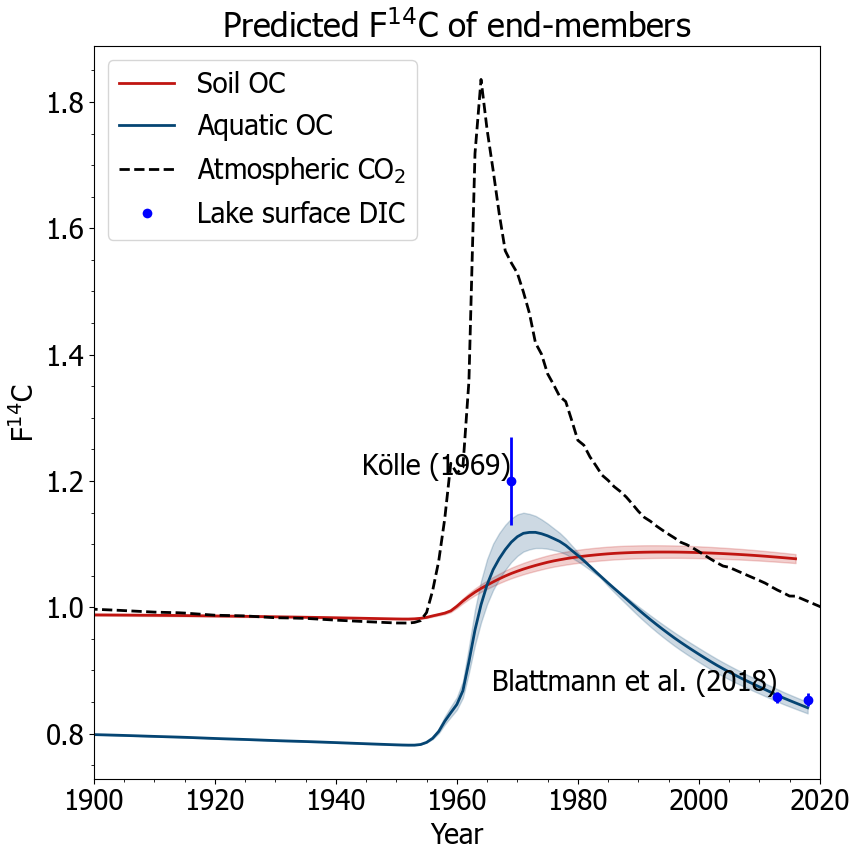

In [11]:
def calculate_F14C(years, turnover_time, lag_time, F14C_atm_data):
    lambda14C = 1.21e-4  # 14C decay rate (year^-1)
    k = 1 / turnover_time  # Turnover rate
    
    F14C_values = [] #initiate to store values
    # Loop through the years
    for t in years:
        if t <= 1899:
            F14C = k / (k + lambda14C)
        else:
            # Get the atmospheric F14C for the current year
            F14C_Atmt = F14C_atm_data.loc[F14C_atm_data['Year'] == t, 'F14C'].values[0]
            # Get the F14C value of the pool from the previous year
            if len(F14C_values) == 0:
                F14C_prev = k / (k + lambda14C)  # If there's no previous year, use the value for year <= 1900
            else:
                F14C_prev = F14C_values[-1]
            # Calculate the F14C value for the current year
            F14C = k * F14C_Atmt + (1 - k - lambda14C) * F14C_prev
        # Append the calculated F14C value to the output list
        F14C_values.append(F14C)
    # Create a DataFrame with the results
    df_results = pd.DataFrame({
        'Year': years,
        'F14C': F14C_values
    })
    # Apply the lag time effect by shifting the F14C values
    df_results['F14C'] = df_results['F14C'].shift(-lag_time)
    return df_results

def calculate_F14C_with_uncertainty(years, turnover_time, sigma, lag_time, F14C_atm_data):
    # Calculate the best fit, plus sigma, and minus sigma curves
    best_fit = calculate_F14C(years, turnover_time, lag_time, F14C_atm_data)
    plus_sigma = calculate_F14C(years, turnover_time + sigma, lag_time, F14C_atm_data)
    minus_sigma = calculate_F14C(years, turnover_time - sigma, lag_time, F14C_atm_data)
    return best_fit, plus_sigma, minus_sigma

#Apply function to model pools
years = list(range(1900, 2020))  

# Soil parameters
turnover_time_soil = 99
sigma_soil = 11
lag_time_soil = 3  

# Aquatic parameters
turnover_time_aquatic = 11
sigma_aquatic = 2
lag_time_aq = 1 


# Calculate the curves
soil_best_fit, soil_plus_sigma, soil_minus_sigma = calculate_F14C_with_uncertainty(years, turnover_time_soil, sigma_soil, lag_time_soil, F14C_atm_data)

aquatic_best_fit, aquatic_plus_sigma, aquatic_minus_sigma = calculate_F14C_with_uncertainty(years, turnover_time_aquatic, sigma_aquatic, lag_time_aq, F14C_atm_data)


# Set Hardwater Effect
hw = 0.8
aquatic_best_fit['F14C'] *= hw
aquatic_plus_sigma['F14C'] *= hw
aquatic_minus_sigma['F14C'] *= hw

# Plotting
fig = plt.figure(figsize=(9, 9))
# Soil curves
plt.plot(soil_best_fit['Year'], soil_best_fit['F14C'], color=red1, label='Soil Best Fit')
plt.fill_between(soil_best_fit['Year'], soil_minus_sigma['F14C'], soil_plus_sigma['F14C'], color=red1, alpha=0.2)

# Aquatic curves
plt.plot(aquatic_best_fit['Year'], aquatic_best_fit['F14C'], color=blue2, label='Aquatic Best Fit')
plt.fill_between(aquatic_best_fit['Year'], aquatic_minus_sigma['F14C'], aquatic_plus_sigma['F14C'], color=blue2, alpha=0.2)

#Add external Info
errorbar_2013 = plt.errorbar(2013, (0.849 + 0.866) / 2, yerr=(0.866 - 0.849) / 2, color='blue', fmt='o')
plt.text(2013, (0.849 + 0.866) / 2, 'Blattmann et al. (2018)', horizontalalignment='right', verticalalignment='bottom')

errorbar_2018 = plt.errorbar(2018, 0.854, yerr=0.01, color='blue', fmt='o')
plt.text(2018, 0.854,'', horizontalalignment='right', verticalalignment='bottom')

errorbar_1969 = plt.errorbar(1969, (1.13 + 1.27) / 2, yerr=(1.27 - 1.13) / 2, color='blue', fmt='o')
plt.text(1969, (1.13 + 1.27) / 2, 'Kölle (1969)', horizontalalignment='right', verticalalignment='bottom')

# Add atmopshere
plt.plot(F14C_atm_data['Year'], F14C_atm_data['F14C'], color='black',linestyle='--', label='Atmosphere')


#Print for text
# Find the index of the maximum F14C value in the aquatic data
max_F14C_idx = aquatic_best_fit['F14C'].idxmax()
max_F14C_year = aquatic_best_fit.loc[max_F14C_idx, 'Year']
max_F14C_value = aquatic_best_fit.loc[max_F14C_idx, 'F14C']
max_F14C_plus_sigma = aquatic_plus_sigma.loc[max_F14C_idx, 'F14C']
max_F14C_minus_sigma = aquatic_minus_sigma.loc[max_F14C_idx, 'F14C']
# Output the results
print(f"At the year {max_F14C_year}, the F14C value is {max_F14C_value} with an uncertainty of [{max_F14C_minus_sigma}, {max_F14C_plus_sigma}]")


plt.xlabel('Year')
plt.ylabel('F$^{14}$C')
plt.xlim(1900, 2020)
plt.title('Predicted F$^{14}$C of end-members')

# Creating custom legend entries
legend_elements = [
    Line2D([0], [0], color=red1, lw=2, label='Soil OC'),
    Line2D([0], [0], color=blue2, lw=2, label='Aquatic OC'),
    Line2D([0], [0], color='black', linestyle='--', lw=2, label='Atmospheric CO$_2$'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label='Lake surface DIC')
]


# Adding the custom legend to the plot
plt.legend(handles=legend_elements)

plt.tight_layout()
plt.grid(False,which="both")
fig.savefig(OUTPUTDIR / "Figure4B.pdf", format="pdf", dpi=600)
plt.show()

In [12]:
def calculate_delta14C(Fm, Yc):
    """
    Calculate Δ14C from Fm and Yc.
    
    Parameters:
    - Fm: Fraction modern
    - Yc: Year of collection
    
    Returns:
    Δ14C value
    """
    lambda_14C = 0.00012097  # Decay constant for 14C
    delta14C = (Fm * math.exp(lambda_14C * (1950 - Yc)) - 1) * 1000
    return delta14C

## Figure 4C: Composition overtime

In [14]:
file_path_observed = INPUTDIR / "sedimentcore_data.xlsx"
observed_data = pd.read_excel(
    file_path_observed, sheet_name='input_data',
).set_index('Mean depth').rename(columns={'Year of deposition': 'year'})

# Add the 'F14C' column
observed_data['F14C'] = observed_data['D14C'] / 1000 + 1
observed_data = observed_data.dropna(subset=['year', 'D14C', 'd13C', 'ROC_TOC', 'Flood', 'TOC_TN'])

observed_data_filtered = observed_data[observed_data['Flood'] == False]

#years = observed_data['year'].values
years_filtered = observed_data_filtered['year'].values
years_filtered = np.unique(years_filtered)

# Import Modelling Results
file_path = INPUTDIR / "mcmc_output.xlsx"
df = pd.read_excel(file_path)


#Filter the rows based on the ID column
aquatic_rows = df[df['ID'].str.contains('c\[\d+, 0\]', regex=True)]
petrogenic_rows = df[df['ID'].str.contains('c\[\d+, 1\]', regex=True)]
soil_rows = df[df['ID'].str.contains('c\[\d+, 2\]', regex=True)]

#Store the mean values into vectors
Aquatic_Contribution = aquatic_rows['mean'].values
Petrogenic_Contribution = petrogenic_rows['mean'].values
Soil_Contribution = soil_rows['mean'].values

#standard deviation
Aquatic_sigma = aquatic_rows['sd'].values
Petrogenic_sigma = petrogenic_rows['sd'].values
Soil_sigma = soil_rows['sd'].values

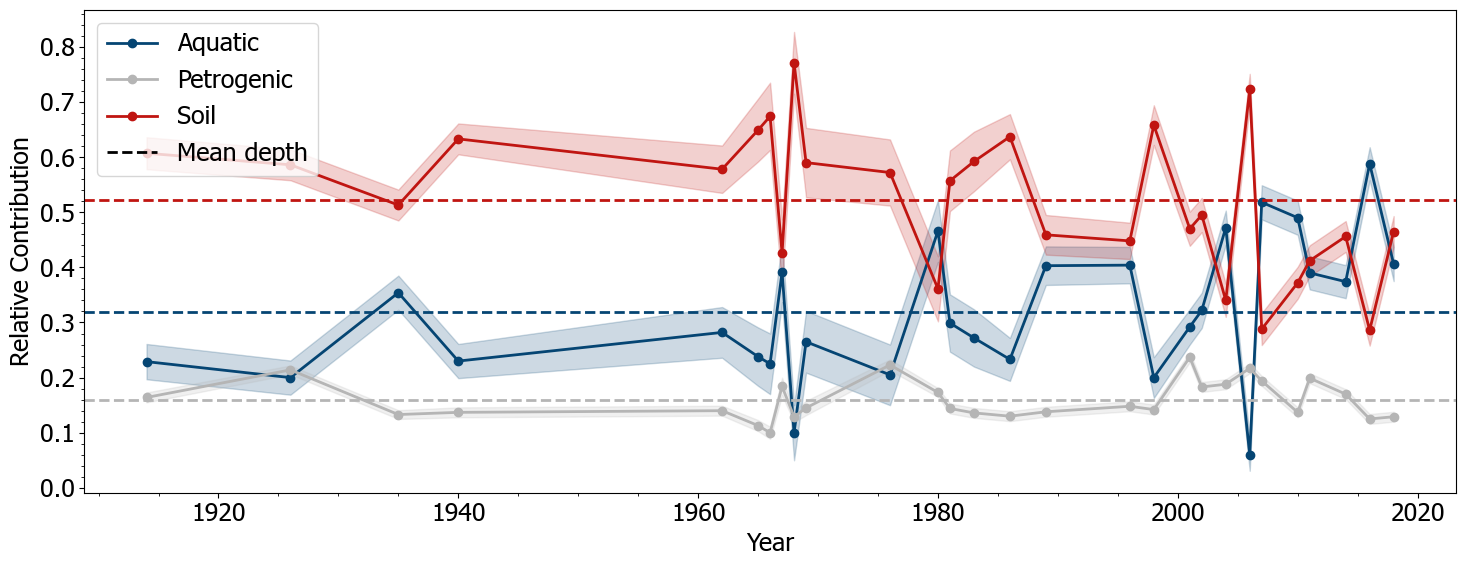

Mean value for Aquatic pool: 0.3181428571428571
Standard deviation for Aquatic pool: 0.1232493738858957
Mean value for Petrogenic pool: 0.1597142857142857
Standard deviation for Petrogenic pool: 0.03533700725348219
Mean value for Soil pool: 0.5220714285714285
Standard deviation for Soil pool: 0.12638657494580113


In [16]:
# Plotting
import matplotlib as mpl

fig = plt.figure(figsize=(15, 6))

# Adjusting font sizes
mpl.rcParams['font.size'] = 18  
mpl.rcParams['axes.labelsize'] = 18  
mpl.rcParams['xtick.labelsize'] = 18  
mpl.rcParams['ytick.labelsize'] = 18  
mpl.rcParams['legend.fontsize'] = 18  

# Aquatic
plt.plot(years_filtered, Aquatic_Contribution, '-o', color=blue2, label='Aquatic')
plt.fill_between(years_filtered, Aquatic_Contribution - Aquatic_sigma, Aquatic_Contribution + Aquatic_sigma, color=blue2, alpha=0.2)
plt.axhline(y=Aquatic_Contribution.mean(), color=blue2, linestyle='--')  

# Petrogenic
plt.plot(years_filtered, Petrogenic_Contribution, '-o', color=grey, label='Petrogenic')
plt.fill_between(years_filtered, Petrogenic_Contribution - Petrogenic_sigma, Petrogenic_Contribution + Petrogenic_sigma, color=grey, alpha=0.2)
plt.axhline(y=Petrogenic_Contribution.mean(), color=grey, linestyle='--')  

# Soil
plt.plot(years_filtered, Soil_Contribution, '-o', color=red1, label='Soil')
plt.fill_between(years_filtered, Soil_Contribution - Soil_sigma, Soil_Contribution + Soil_sigma, color=red1, alpha=0.2)
plt.axhline(y=Soil_Contribution.mean(), color=red1, linestyle='--')  

# Mean line for legend
plt.plot([], [], color='black', linestyle='--', label='Mean depth')  # This line won't show on the plot, but will appear in the legend

# Additional plot settings
plt.xlabel('Year')
plt.ylabel('Relative Contribution')
plt.legend()
plt.grid(False,which="both")  # Remove gridlines
plt.tight_layout()
fig.savefig(OUTPUTDIR / "Figure4C.svg", format="svg", dpi=600)

plt.show()

print("Mean value for Aquatic pool:", Aquatic_Contribution.mean())
print("Standard deviation for Aquatic pool:", Aquatic_Contribution.std())
print("Mean value for Petrogenic pool:", Petrogenic_Contribution.mean())
print("Standard deviation for Petrogenic pool:", Petrogenic_Contribution.std())
print("Mean value for Soil pool:", Soil_Contribution.mean())
print("Standard deviation for Soil pool:", Soil_Contribution.std())

In [17]:
# Find the year of peak and lowest contribution for Aquatic
max_aquatic_index = np.argmax(Aquatic_Contribution)
min_aquatic_index = np.argmin(Aquatic_Contribution)
print(f"Aquatic contribution peaked in {years_filtered[max_aquatic_index]} with {Aquatic_Contribution[max_aquatic_index]:.4f} and had the lowest value in {years_filtered[min_aquatic_index]} with {Aquatic_Contribution[min_aquatic_index]:.4f}.")

# Find the year of peak and lowest contribution for Petrogenic
max_petrogenic_index = np.argmax(Petrogenic_Contribution)
min_petrogenic_index = np.argmin(Petrogenic_Contribution)
print(f"Petrogenic contribution peaked in {years_filtered[max_petrogenic_index]} with {Petrogenic_Contribution[max_petrogenic_index]:.4f} and had the lowest value in {years_filtered[min_petrogenic_index]} with {Petrogenic_Contribution[min_petrogenic_index]:.4f}.")

# Find the year of peak and lowest contribution for Soil
max_soil_index = np.argmax(Soil_Contribution)
min_soil_index = np.argmin(Soil_Contribution)
print(f"Soil contribution peaked in {years_filtered[max_soil_index]} with {Soil_Contribution[max_soil_index]:.4f} and had the lowest value in {years_filtered[min_soil_index]} with {Soil_Contribution[min_soil_index]:.4f}.")


Aquatic contribution peaked in 2016 with 0.5880 and had the lowest value in 2006 with 0.0600.
Petrogenic contribution peaked in 2001 with 0.2370 and had the lowest value in 1966 with 0.1000.
Soil contribution peaked in 1968 with 0.7710 and had the lowest value in 2016 with 0.2860.
